# Sklearn Tutorial Validation
The purpose of this notebook is to test the validation scores of the best found solutions at the end of the GA. 

In [1]:
from figures_markdown_snippets import show_data_instructions

show_data_instructions()


To generate data, run:
- for sklearn
    ```bash
sbatch generate_sklearn_data.sb -n 10 -p 10
    ```
- for dhahri
    ```bash
sbatch generate_dhahri_data.sb -n 20 -p 100 -t 30
    ```
These commands generate files for running genetic search using 10 generations and population size of 10
for the sklearn tutorial and 20 generations with population size of 100
for the Breast Cancer Wisconsin (Diagnostic) Dataset respectively.

The `-n`, `-p`, `-t` flags control number of generations, population sizes, 
and number of trials respectively.

The data generated tracks the top 10 individuals and the population by
each generation and is stored in the corresponding output 
(i.e. the slurm_\[id\].out file).

To extract this data to a csv file, run:
- for the top 10 individuals:
    ```bash
grep "# GEN HOF_index" slurm_[id].out | cut -d '|' -f2 > "filename_1.csv"
    ```
- for the population:
    ```bash
grep "# GEN population_index" slurm_[id].out | cut -d '|' -f2 > "filename_2.csv"
    ```
    
If one has multiple output files that contain different trials of the same
type of GA run, one could try the moving all the relevant files into 
one directory, changing to that directory, and running the following commands instead:
- for the top 10 individuals:
    ```bash
grep "# GEN HOF_index" *.out | cut -d '|' -f2 > "filename_1.csv"
    ```
- for the population:
    ```bash
grep "# GEN population_index" *.out | cut -d '|' -f2 > "filename_2.csv"
    ```


In [2]:
# Path hack so that we can import see library.
import sys, os
sys.path.insert(0, os.path.abspath('..'))

In [3]:
# Set data file names

population_datasets = [
    "../data/0802_sklearn_data/circles_population_100_100.csv",
    "../data/0802_sklearn_data/linearly_separable_population_100_100.csv",
    "../data/0802_sklearn_data/moons_population_100_100.csv",
]

hof_datasets = [
    "../data/0802_sklearn_data/circles_hof_100_100.csv",
    "../data/0802_sklearn_data/linearly_separable_hof_100_100.csv",
    "../data/0802_sklearn_data/moons_hof_100_100.csv",
]

In [4]:
import pandas as pd
import numpy as np
from see import classifiers
from see.classifier_helpers.helpers import generate_train_test_set, generate_pipeline_dataset
from sklearn.datasets import make_circles, make_moons, make_classification
from sklearn.preprocessing import StandardScaler

# Create datasets
ds_names = ["Circles", "Linearly Separable", "Moons"]

datasets = []

# Circles
datasets.append(make_circles(noise=0.2, factor=0.5, random_state=1))

# Linearly Separable
X, y = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
datasets.append((X, y))

# Moons
datasets.append(make_moons(noise=0.3, random_state=0))

# Recreate training sets
training_sets = []

for ds in datasets:
    X, y = ds

    # preprocess data
    X = StandardScaler().fit_transform(X)

    training_sets.append(generate_pipeline_dataset(X, y))

In [5]:
from see.classifier_helpers.helpers import generate_pipeline_dataset

# Generate validation sets

validation_sets = []

# Circles
X, y = make_circles(noise=0.2, factor=0.5, random_state=2)

validation_sets.append(generate_pipeline_dataset(X, y))

# Linearly Separable
X, y = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=2,
    n_clusters_per_class=1,
)

rng = np.random.RandomState(3)
X += 2 * rng.uniform(size=X.shape)
validation_sets.append(generate_pipeline_dataset(X, y))

# Moons
X, y = make_moons(noise=0.3, random_state=2)
validation_sets.append(generate_pipeline_dataset(X, y))

# preprocess data
for ds in validation_sets:
    ds.X = StandardScaler().fit_transform(ds.X)

In [6]:
# List details about GA runs
num_gen = 100
pop_size = 100
num_trials = 100
hof_size = 10

In [7]:
# Import Helper functions
from figures_helpers import (
    extract_hof_and_pop,
    create_hof_at_gen,
    create_learning_curve,
    plot_learning_curve,
)

# Extract the Hall-of-fame at the final generation

# For each dataset,
# store the hall of fame member's algorithm vector
# and ...

best_hof_per_dataset = []
best_hof_list_per_dataset = []

for hof_filepath in hof_datasets:
    best_hof, best_hof_individuals = create_hof_at_gen(
        hof_filepath, num_gen, pop_size, num_trials, hof_size, at_gen=num_gen
    )
    best_hof_per_dataset.append(best_hof)
    best_hof_list_per_dataset.append(best_hof_individuals)

Done with individual:  0
Done with individual:  1
Done with individual:  2
Done with individual:  3
Done with individual:  4
Done with individual:  5
Done with individual:  6
Done with individual:  7
Done with individual:  8
Done with individual:  9
Done with individual:  10
Done with individual:  11
Done with individual:  12
Done with individual:  13
Done with individual:  14
Done with individual:  15
Done with individual:  16
Done with individual:  17
Done with individual:  18
Done with individual:  19
Done with individual:  20
Done with individual:  21
Done with individual:  22
Done with individual:  23
Done with individual:  24
Done with individual:  25
Done with individual:  26
Done with individual:  27
Done with individual:  28
Done with individual:  29
Done with individual:  30
Done with individual:  31
Done with individual:  32
Done with individual:  33
Done with individual:  34
Done with individual:  35
Done with individual:  36
Done with individual:  37
Done with individual: 

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Opti

Done with individual:  11
Done with individual:  12
Done with individual:  13
Done with individual:  14
Done with individual:  15
Done with individual:  16
Done with individual:  17
Done with individual:  18
Done with individual:  19


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Opti

Done with individual:  20
Done with individual:  21
Done with individual:  22
Done with individual:  23
Done with individual:  24
Done with individual:  25
Done with individual:  26


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Opti

Done with individual:  27
Done with individual:  28
Done with individual:  29
Done with individual:  30
Done with individual:  31
Done with individual:  32
Done with individual:  33
Done with individual:  34
Done with individual:  35
Done with individual:  36
Done with individual:  37
Done with individual:  38
Done with individual:  39
Done with individual:  40
Done with individual:  41
Done with individual:  42
Done with individual:  43
Done with individual:  44
Done with individual:  45


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Opti

Done with individual:  46
Done with individual:  47
Done with individual:  48
Done with individual:  49
Done with individual:  50
Done with individual:  51
Done with individual:  52
Done with individual:  53
Done with individual:  54
Done with individual:  55
Done with individual:  56
Done with individual:  57
Done with individual:  58
Done with individual:  59
Done with individual:  60
Done with individual:  61
Done with individual:  62
Done with individual:  63
Done with individual:  64


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Opti

Done with individual:  65
Done with individual:  66
Done with individual:  67
Done with individual:  68


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=70000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=70000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=70000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packa

Done with individual:  69
Done with individual:  70
Done with individual:  71
Done with individual:  72
Done with individual:  73
Done with individual:  74
Done with individual:  75
Done with individual:  76
Done with individual:  77
Done with individual:  78
Done with individual:  79
Done with individual:  80
Done with individual:  81
Done with individual:  82
Done with individual:  83
Done with individual:  84
Done with individual:  85
Done with individual:  86
Done with individual:  87
Done with individual:  88
Done with individual:  89
Done with individual:  90
Done with individual:  91
Done with individual:  92
Done with individual:  93
Done with individual:  94
Done with individual:  95
Done with individual:  96
Done with individual:  97
Done with individual:  98
Done with individual:  99
Done with individual:  0
Done with individual:  1
Done with individual:  2
Done with individual:  3
Done with individual:  4
Done with individual:  5
Done with individual:  6
Done with individua

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/skle

Done with individual:  95
Done with individual:  96
Done with individual:  97
Done with individual:  98
Done with individual:  99


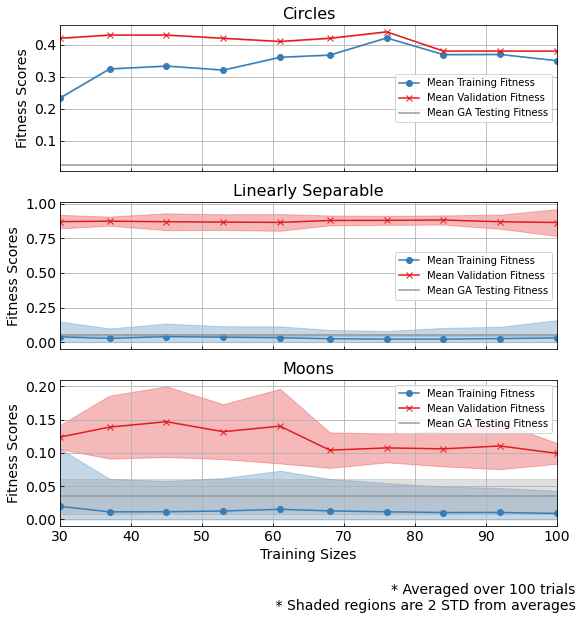

In [8]:
%%time
# Plot learning curves

import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, sharex=True, figsize=(8,8))

for i in range(3):
    
    hof_portion = best_hof_per_dataset[i]

    # Quick HACK:
    # This plot/notebook takes a long time to fully complete running
    # if it uses all of the hall of fame members (even for a specific generation).
    # For speed, we extract the first five of the hall of fame.
    # One should comment out this cell when intending to
    # create this figure with all of the data.

    # Comment out the line below
    # and rerun the notebook from the beginning 
    # to properly making figure.

    hof_portion = hof_portion[:100] # extract first 'n' members

    train_sizes, train_matrix, validation_matrix = create_learning_curve(
        training_sets[i], validation_sets[i], hof_portion
    )

    plot_learning_curve(train_sizes, train_matrix, validation_matrix, axs[i])
    axs[i].set_xlim(train_sizes[0], train_sizes[-1])

    # Plot Expected Region during GA
    ga_mean = np.repeat(best_hof_list_per_dataset[i][:, 2].mean(), len(train_sizes))
    ga_std = np.repeat(best_hof_list_per_dataset[i][:, 2].std(), len(train_sizes))

    alpha = 0.3

    gray = "#999999"

    # Add expected range from data during the GA
    axs[i].fill_between(
        train_sizes, ga_mean - 2 * ga_std, ga_mean + 2 * ga_std, alpha=alpha, color=gray
    )

    axs[i].plot(
        train_sizes,
        ga_mean,
        "-",
        color=gray,
        label="Mean GA Testing Fitness",
        linewidth=1.5,
    )
    
    axs[i].set_title(ds_names[i], fontdict={'fontsize': 16})

    # Reformat axis labels
    axs[i].set_ylabel('Fitness Scores', fontdict={'fontsize': 14})

    if i == 2:
        axs[i].set_xlabel('Training Sizes', fontdict={'fontsize': 14})
    else:
        axs[i].set_xlabel('')

    
    # Regenerate the legend
    axs[i].legend()
    
    # Remove text
    for txt in axs[i].texts:
        txt.set_visible(False)


# Add caption
plt.figtext(
    0.99,
    -0.065,
    "* Averaged over 100 trials\n * Shaded regions are 2 STD from averages",
    horizontalalignment="right",
    fontdict={"fontsize": 14},
)
fig.tight_layout()